Dataset shape: (70000, 14)

First few rows:
   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            0     0      0   
1   1  20228    1     156    85.0    140     90            1     0      0   
2   2  18857    1     165    64.0    130     70            1     0      0   
3   3  17623    2     169    82.0    150    100            0     0      0   
4   4  17474    1     156    56.0    100     60            0     0      0   

   alco  active  cardio  overweight  
0     0       1       0           0  
1     0       1       1           1  
2     0       0       1           0  
3     0       1       1           1  
4     0       0       0           0  

Overweight distribution:
overweight
1    43546
0    26454
Name: count, dtype: int64

Normalized cholesterol distribution:
cholesterol
0    52385
1    17615
Name: count, dtype: int64

Normalized glucose distribution:
gluc
0    59479
1    10521
Name: count, dtype: i

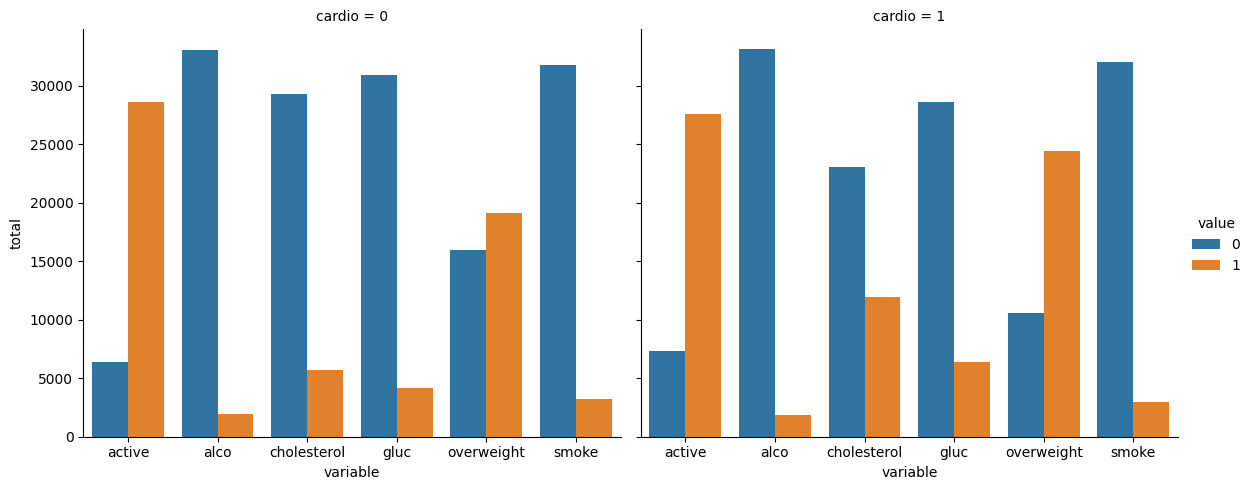

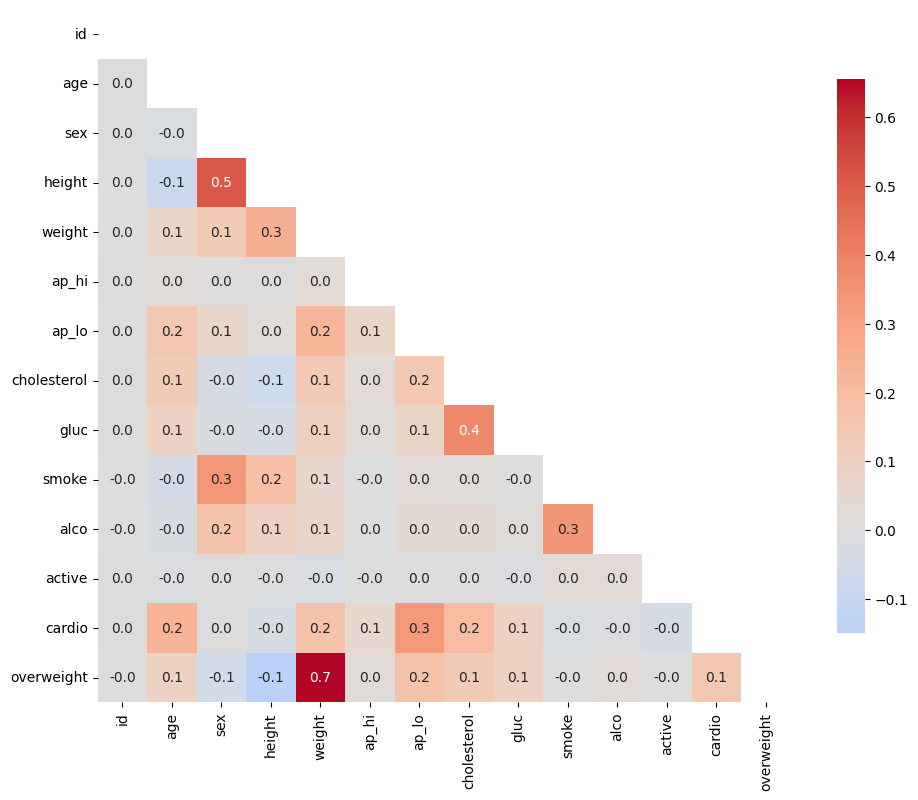


Analysis complete!


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1. Import the data from medical_examination.csv and assign it to the df variable
df = pd.read_csv(r"C:\Users\Mehak\Downloads\medical_examination (1).csv")

# 2. Add an overweight column to the data
# Calculate BMI and determine if person is overweight (BMI > 25)
df['overweight'] = ((df['weight'] / ((df['height'] / 100) ** 2)) > 25).astype(int)

# 3. Normalize data by making 0 always good and 1 always bad
# For cholesterol and gluc: 1 is normal (good), so we make it 0
# Values > 1 are bad, so we make them 1
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# 4. Draw the Categorical Plot in the draw_cat_plot function
def draw_cat_plot():
    # 5. Create a DataFrame for the cat plot using pd.melt
    df_cat = pd.melt(df, 
                     id_vars=['cardio'], 
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    # 6. Group and reformat the data in df_cat to split it by cardio
    # Show the counts of each feature
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    
    # 7. Convert the data into long format and create a chart using seaborn's catplot()
    fig = sns.catplot(data=df_cat, 
                      kind='bar',
                      x='variable', 
                      y='total', 
                      hue='value', 
                      col='cardio',
                      height=5, 
                      aspect=1.2)
    
    # 8. Get the figure for the output and store it in the fig variable
    fig = fig.fig
    
    return fig

# 9. Do not modify the next two lines
# (These would be used in the original FreeCodeCamp project)

# 10. Draw the Heat Map in the draw_heat_map function
def draw_heat_map():
    # 11. Clean the data in the df_heat variable by filtering out patient segments
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &  # diastolic <= systolic
        (df['height'] >= df['height'].quantile(0.025)) &  # height >= 2.5th percentile
        (df['height'] <= df['height'].quantile(0.975)) &  # height <= 97.5th percentile
        (df['weight'] >= df['weight'].quantile(0.025)) &  # weight >= 2.5th percentile
        (df['weight'] <= df['weight'].quantile(0.975))    # weight <= 97.5th percentile
    ]
    
    # 12. Calculate the correlation matrix and store it in the corr variable
    corr = df_heat.corr()
    
    # 13. Generate a mask for the upper triangle and store it in the mask variable
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # 14. Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 9))
    
    # 15. Plot the correlation matrix using seaborn's heatmap()
    sns.heatmap(corr, 
                mask=mask, 
                annot=True, 
                fmt='.1f', 
                center=0, 
                square=True, 
                cmap='coolwarm',
                cbar_kws={'shrink': 0.8},
                ax=ax)
    
    return fig

# 16. Do not modify the next two lines
# (These would be used in the original FreeCodeCamp project)

# Example usage and display of results
if __name__ == "__main__":
    print("Dataset shape:", df.shape)
    print("\nFirst few rows:")
    print(df.head())
    
    print("\nOverweight distribution:")
    print(df['overweight'].value_counts())
    
    print("\nNormalized cholesterol distribution:")
    print(df['cholesterol'].value_counts())
    
    print("\nNormalized glucose distribution:")
    print(df['gluc'].value_counts())
    
    # Create and display categorical plot
    cat_fig = draw_cat_plot()
    plt.show()
    
    # Create and display heat map
    heat_fig = draw_heat_map()
    plt.show()
    
    print("\nAnalysis complete!")